In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_recall_curve, roc_curve, auc, roc_auc_score,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Enhanced Product Substitutability Analysis")
print("=" * 50)


📊 Enhanced Product Substitutability Analysis


In [2]:
df_look = pd.read_excel('edade.xlsx')
df_look

,p1,p2,substitution_score,substitutability,p1_cat,p2_cat
0,P0001,P0002,0.203007,No,Oil,Accessories
1,P0001,P0003,0.331352,No,Oil,Shock Absorber
2,P0001,P0004,0.348910,No,Oil,Shock Absorber
3,P0001,P0005,0.470073,No,Oil,Batteries
4,P0001,P0006,0.426617,No,Oil,Shock Absorber
...,...,...,...,...,...,...
19895,P0197,P0199,0.467752,No,Batteries,Tires
19896,P0197,P0200,0.206736,No,Batteries,Shock Absorber
19897,P0198,P0199,0.354609,No,Accessories,Tires
19898,P0198,P0200,0.197978,No,Accessories,Shock Absorber


In [3]:
# Basic data exploration
print("\n📋 Dataset Overview:")
print(f"Ground truth shape: {df_look.shape}")

# Check for missing values
print(f"\n🔍 Missing values in ground truth: {df_look.isnull().sum().sum()}")

# Display basic statistics
print(f"\n📊 Ground Truth Distribution:")
print(df_look['substitutability'].value_counts())
print(f"\nSubstitutability rate: {df_look['substitutability'].value_counts()['Yes'] / len(df_look):.2%}")

print(f"\n📊 Prediction Scores Distribution:")
print(f"Min substitution score: {df_look['substitution_score'].min():.4f}")
print(f"Max substitution score: {df_look['substitution_score'].max():.4f}")
print(f"Mean substitution score: {df_look['substitution_score'].mean():.4f}")
print(f"Median substitution score: {df_look['substitution_score'].median():.4f}")


📋 Dataset Overview:
Ground truth shape: (19900, 6)

🔍 Missing values in ground truth: 0

📊 Ground Truth Distribution:
substitutability
No     19516
Yes      384
Name: count, dtype: int64

Substitutability rate: 1.93%

📊 Prediction Scores Distribution:
Min substitution score: 0.1041
Max substitution score: 0.9054
Mean substitution score: 0.3813
Median substitution score: 0.3527


In [4]:
# Advanced threshold analysis with comprehensive metrics
print("🔍 Advanced Threshold Analysis")
print("=" * 50)

# Define a comprehensive range of thresholds
thresholds = np.arange(0.1, 0.95, 0.01)
thresholds = [round(x, 2) for x in thresholds]

# Prepare data for analysis
y_true = (df_look['substitutability'] == 'Yes').astype(int)
y_scores = df_look['substitution_score'].values

# Initialize results storage
results = []

print("Computing metrics for each threshold...")
for threshold in thresholds:
    # Create binary predictions
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate all metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Calculate additional metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = recall  # Same as recall
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # Store results
    results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'sensitivity': sensitivity,
        'fpr': fpr,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn
    })

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

print(f"✅ Analyzed {len(thresholds)} thresholds")
print(f"📊 Results summary:")
print(f"   Best accuracy: {results_df['accuracy'].max():.4f} at threshold {results_df.loc[results_df['accuracy'].idxmax(), 'threshold']}")
print(f"   Best F1: {results_df['f1'].max():.4f} at threshold {results_df.loc[results_df['f1'].idxmax(), 'threshold']}")
print(f"   Best precision: {results_df['precision'].max():.4f} at threshold {results_df.loc[results_df['precision'].idxmax(), 'threshold']}")
print(f"   Best recall: {results_df['recall'].max():.4f} at threshold {results_df.loc[results_df['recall'].idxmax(), 'threshold']}")

🔍 Advanced Threshold Analysis
Computing metrics for each threshold...
✅ Analyzed 85 thresholds
📊 Results summary:
   Best accuracy: 0.9927 at threshold 0.79
   Best F1: 0.7786 at threshold 0.78
   Best precision: 1.0000 at threshold 0.82
   Best recall: 1.0000 at threshold 0.1


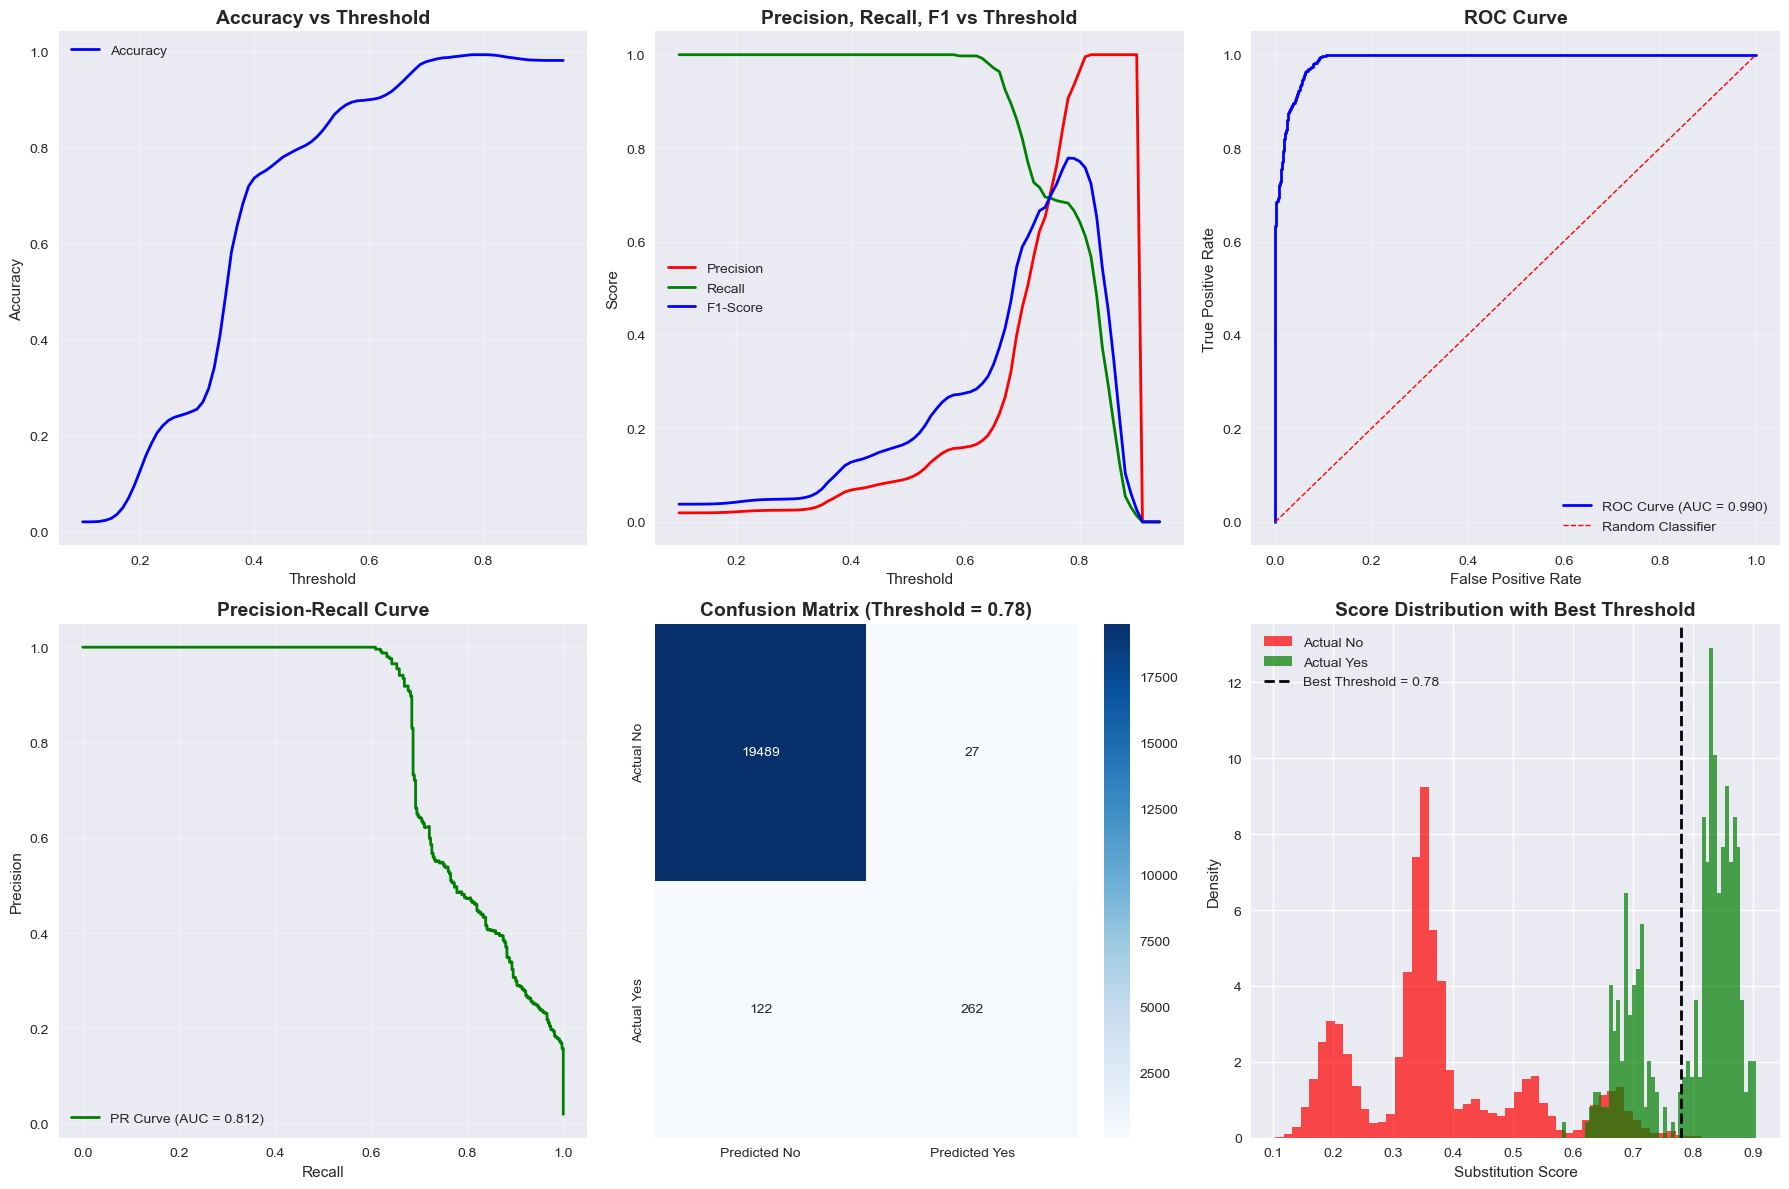


🏆 Top 10 Thresholds by F1-Score:
    threshold  accuracy  precision  recall      f1  specificity
68       0.78    0.9925     0.9066  0.6823  0.7786       0.9986
69       0.79    0.9927     0.9343  0.6667  0.7781       0.9991
70       0.80    0.9927     0.9648  0.6432  0.7719       0.9995
71       0.81    0.9925     0.9958  0.6120  0.7581       0.9999
67       0.77    0.9914     0.8376  0.6849  0.7536       0.9974
72       0.82    0.9917     1.0000  0.5677  0.7243       1.0000
66       0.76    0.9898     0.7630  0.6875  0.7233       0.9958
65       0.75    0.9885     0.7074  0.6927  0.7000       0.9944
64       0.74    0.9870     0.6528  0.6953  0.6734       0.9927
63       0.73    0.9861     0.6222  0.7161  0.6659       0.9914


In [5]:
# Comprehensive visualization of threshold analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Accuracy vs Threshold
axes[0,0].plot(results_df['threshold'], results_df['accuracy'], 'b-', linewidth=2, label='Accuracy')
axes[0,0].set_title('Accuracy vs Threshold', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Threshold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# 2. Precision, Recall, F1 vs Threshold
axes[0,1].plot(results_df['threshold'], results_df['precision'], 'r-', linewidth=2, label='Precision')
axes[0,1].plot(results_df['threshold'], results_df['recall'], 'g-', linewidth=2, label='Recall')
axes[0,1].plot(results_df['threshold'], results_df['f1'], 'b-', linewidth=2, label='F1-Score')
axes[0,1].set_title('Precision, Recall, F1 vs Threshold', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Threshold')
axes[0,1].set_ylabel('Score')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
axes[0,2].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0,2].plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier')
axes[0,2].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('False Positive Rate')
axes[0,2].set_ylabel('True Positive Rate')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].legend()

# 4. Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall_curve, precision_curve)
axes[1,0].plot(recall_curve, precision_curve, 'g-', linewidth=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
axes[1,0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Recall')
axes[1,0].set_ylabel('Precision')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 5. Confusion Matrix Heatmap for best F1 threshold
best_f1_idx = results_df['f1'].idxmax()
best_threshold = results_df.loc[best_f1_idx, 'threshold']
y_pred_best = (y_scores >= best_threshold).astype(int)
cm = confusion_matrix(y_true, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1],
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
axes[1,1].set_title(f'Confusion Matrix (Threshold = {best_threshold})', fontsize=14, fontweight='bold')

# 6. Threshold distribution analysis
axes[1,2].hist(y_scores[y_true == 0], bins=50, alpha=0.7, label='Actual No', density=True, color='red')
axes[1,2].hist(y_scores[y_true == 1], bins=50, alpha=0.7, label='Actual Yes', density=True, color='green')
axes[1,2].axvline(best_threshold, color='black', linestyle='--', linewidth=2, label=f'Best Threshold = {best_threshold}')
axes[1,2].set_title('Score Distribution with Best Threshold', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Substitution Score')
axes[1,2].set_ylabel('Density')
axes[1,2].legend()

plt.tight_layout()
plt.show()

# Display detailed results for top thresholds
print("\n🏆 Top 10 Thresholds by F1-Score:")
print("=" * 60)
top_thresholds = results_df.nlargest(10, 'f1')[['threshold', 'accuracy', 'precision', 'recall', 'f1', 'specificity']]
print(top_thresholds.round(4))

In [6]:
# Calculate the average substitution_score for pairs labeled as 'Yes'
avg_score_yes = df_look[df_look['substitutability'] == 'Yes']['substitution_score'].astype(float).mean()
print(f"\nAverage substitution_score for 'Yes' pairs: {avg_score_yes:.4f}")



Average substitution_score for 'Yes' pairs: 0.7964
